Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
auto_df = pd.read_csv('automobile.txt', sep=',')
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing
#### Identify columns with missing data

Identify columns that have missing data in them

In [3]:
missing_values_count = auto_df.isnull().sum()
missing_values_count[0:26]

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Drop unwanted columns

In [4]:
auto_df.drop(['symboling', 'normalized-losses', 'bore', 'stroke'], axis = 1, inplace= True)
auto_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136,mpfi,8.0,115,5500,18,22,17450


#### Remove any duplicate rows

In [5]:
remove_duplicate_rows = auto_df.drop_duplicates()

#### Change data types
Identify what data-types each column is and make the neccasary changes required


In [6]:
data_type= auto_df.dtypes
print(data_type)

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


##### Change the num-of-cylinders values to integers

In [7]:
value_mapping= {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10}
auto_df['num-of-cylinders']= auto_df['num-of-cylinders'].map(value_mapping)

##### Correct the price columns missing "?" values to NaN and then change the Data-type to int64.

In [8]:
auto_df['price'] = auto_df['price'].replace('?', np.nan)
auto_df['price'] = pd.to_numeric(auto_df['price'], errors='coerce').astype('Int64')

##### Change columns 'horsepower', 'peak-rpm', 'price' from object to int64.

In [9]:
columns_to_change = ['horsepower', 'peak-rpm']
for column in columns_to_change:
    auto_df[column] = pd.to_numeric(auto_df[column], errors='coerce')


##### Change 'drive-wheels' column to correct formatting

In [10]:
auto_df['drive-wheels'].replace('rwd', 'rear wheel drive', inplace = True)
auto_df['drive-wheels'].replace('fwd', 'front wheel drive', inplace = True)
auto_df['drive-wheels'].replace('4wd', 'four wheel drive', inplace = True)

In [11]:
data_type= auto_df.dtypes
print(data_type)

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders     float64
engine-size            int64
fuel-system           object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  Int64
dtype: object


In [12]:
auto_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rear wheel drive,front,88.6,168.8,64.1,...,dohc,4.0,130,mpfi,9.0,111.0,5000.0,21,27,13495
1,alfa-romero,gas,std,two,convertible,rear wheel drive,front,88.6,168.8,64.1,...,dohc,4.0,130,mpfi,9.0,111.0,5000.0,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rear wheel drive,front,94.5,171.2,65.5,...,ohcv,6.0,152,mpfi,9.0,154.0,5000.0,19,26,16500
3,audi,gas,std,four,sedan,front wheel drive,front,99.8,176.6,66.2,...,ohc,4.0,109,mpfi,10.0,102.0,5500.0,24,30,13950
4,audi,gas,std,four,sedan,four wheel drive,front,99.4,176.6,66.4,...,ohc,5.0,136,mpfi,8.0,115.0,5500.0,18,22,17450


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 
How do the 5 most expensive cars compare in horsepower compared to the 5 cheapest cars?


In [13]:
expensive_cars = auto_df.nlargest(5, 'price')
print("Five Most expensive cars:")
for make in expensive_cars['make']:
    print(make)

Five Most expensive cars:
mercedes-benz
bmw
mercedes-benz
porsche
bmw


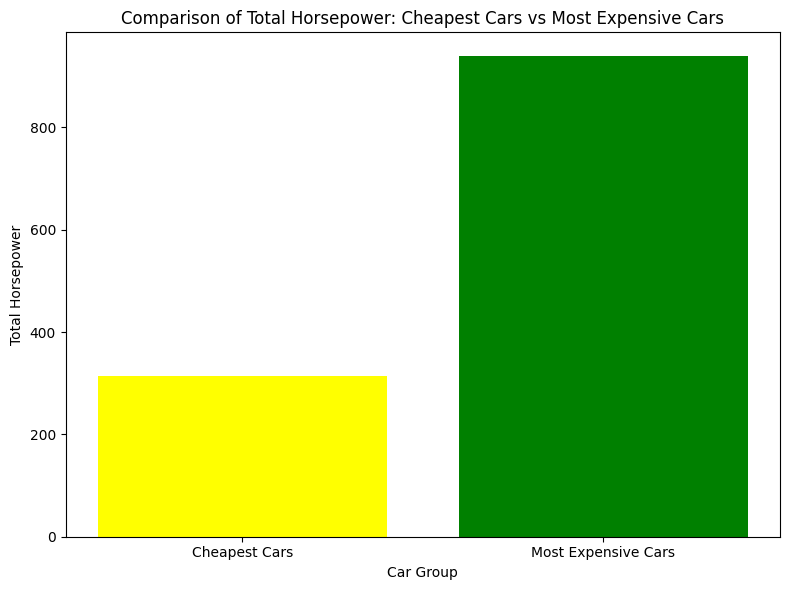

In [14]:
# Sort the DataFrame by price in ascending order and select the 5 cheapest cars
cheapest_cars = auto_df.sort_values(by='price', ascending=True).head(5)

# Sort the DataFrame by price in descending order and select the 5 most expensive cars
expensive_cars = auto_df.sort_values(by='price', ascending=False).head(5)

# Calculate the total horsepower for each group
total_horsepower_cheapest = cheapest_cars['horsepower'].sum()
total_horsepower_expensive = expensive_cars['horsepower'].sum()

# Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(['Cheapest Cars', 'Most Expensive Cars'], [total_horsepower_cheapest, total_horsepower_expensive], color=['yellow', 'green'])
plt.xlabel('Car Group')
plt.ylabel('Total Horsepower')
plt.title('Comparison of Total Horsepower: Cheapest Cars vs Most Expensive Cars')
plt.tight_layout()
plt.savefig('5 expensive vs cheapest horsepower.png')
plt.show()

#### Do cars with a greater horsepower have a higher city MPG?



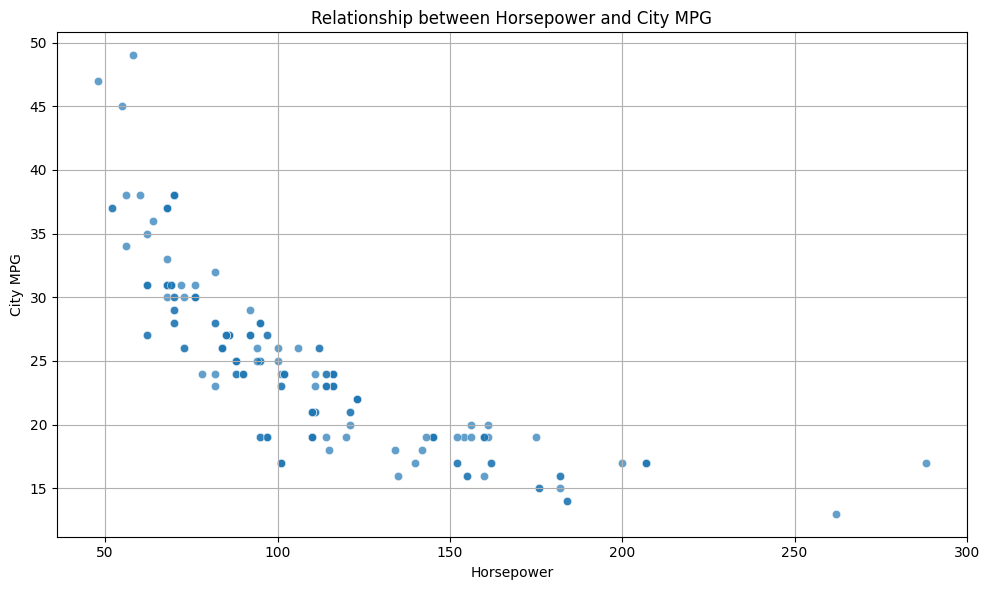

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='city-mpg', data=auto_df, alpha=0.7)
plt.xlabel('Horsepower')
plt.ylabel('City MPG')
plt.title('Relationship between Horsepower and City MPG')
plt.grid(True)
plt.tight_layout()
plt.savefig('greater horsepower city mpg.png')
plt.show()

#### Do cars with the fuel-type Gas or Diesel have a higher Highway-mpg?

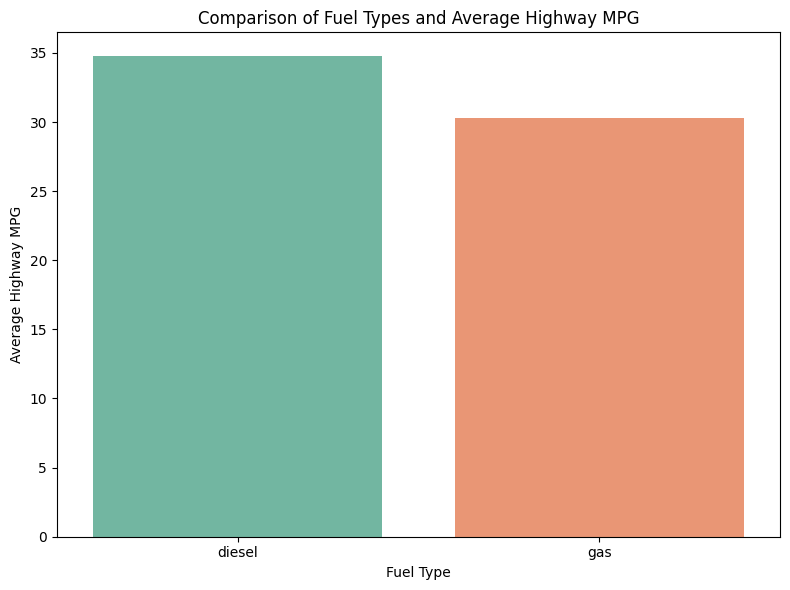

In [16]:
# Group data by fuel type and calculate the average highway mpg
fuel_type_avg_highway_mpg = auto_df.groupby('fuel-type')['highway-mpg'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='fuel-type', y='highway-mpg', data=fuel_type_avg_highway_mpg, palette='Set2')
plt.xlabel('Fuel Type')
plt.ylabel('Average Highway MPG')
plt.title('Comparison of Fuel Types and Average Highway MPG')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('diesel vs gas highway mpg.png')
plt.show()

#### Do cars with a greater engine size have a better or worse compression ratio?

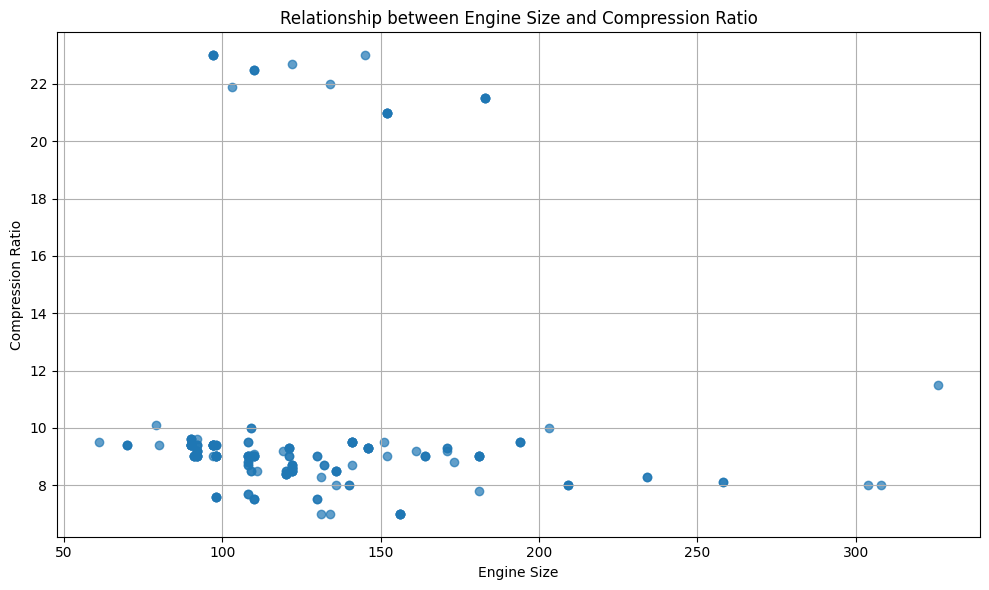

In [17]:
plt.figure(figsize=(10, 6))

plt.scatter(auto_df['engine-size'], auto_df['compression-ratio'], alpha=0.7)

plt.xlabel('Engine Size')
plt.ylabel('Compression Ratio')
plt.title('Relationship between Engine Size and Compression Ratio')
plt.grid(True)

plt.tight_layout()
plt.savefig('engine size vs compression ratio.png')
plt.show()

#### Do cars with more cylinders have a greater or smaller peak-rpm?

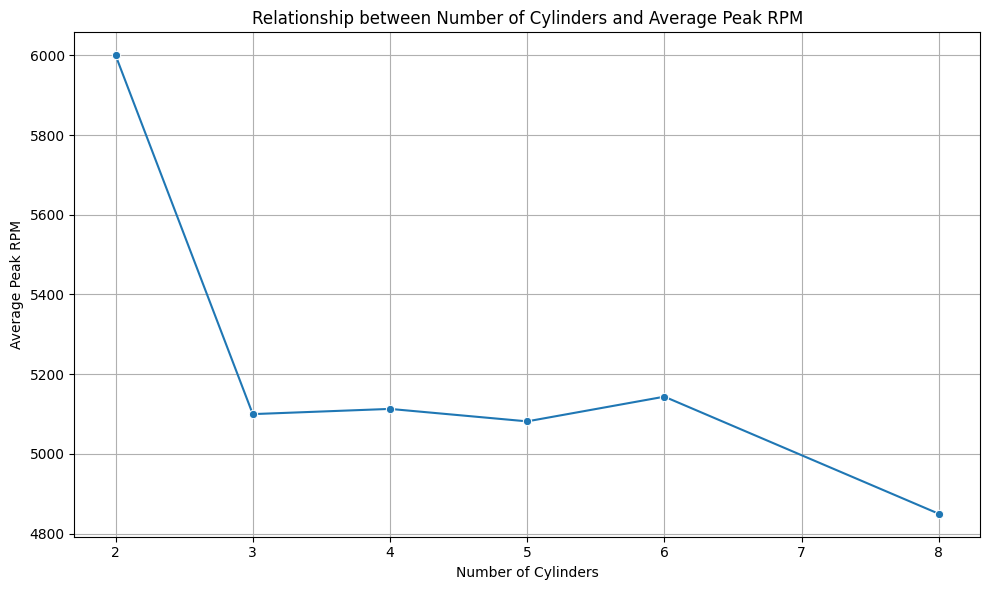

In [18]:
 # Group data by the number of cylinders and calculate the average peak RPM
cylinder_avg_peak_rpm = auto_df.groupby('num-of-cylinders')['peak-rpm'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='num-of-cylinders', y='peak-rpm', data=cylinder_avg_peak_rpm, marker='o')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Peak RPM')
plt.title('Relationship between Number of Cylinders and Average Peak RPM')
plt.grid(True)
plt.tight_layout()
plt.savefig('cylinders vs peak rpm.png')
plt.show()